<a href="https://colab.research.google.com/github/mmuchsin/submission-ml-dicoding/blob/main/submission_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Akhir : Image Classification Model Deployment**

## **Identitas**



*   Nama  : M Muchsin
*   Email : m.muchsin21@gmail.com



## **Data Collecting**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shanmukh05/ml-hackathon

 99% 343M/346M [00:03<00:00, 96.7MB/s]
100% 346M/346M [00:04<00:00, 89.7MB/s]


In [ ]:
#ektraksi data
!unzip /content/ml-hackathon.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain

## **Import Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

## **Data Preproccessing**

### **Preprocessing Training Dataset**

In [ ]:
!cp -rf /content/seg_train/seg_train/* -d /content/dataset

In [ ]:
!cp -rf /content/seg_test/seg_test/* -d /content/dataset

In [ ]:
#augmentasi training_dataset
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      rotation_range=30,
                                      horizontal_flip = True,
                                      fill_mode="nearest",
                                      validation_split=0.2)

training_dataset = training_datagen.flow_from_directory('/content/dataset',
                                                        target_size = (100, 100),         
                                                        batch_size = 32,                
                                                        subset='training',
                                                        class_mode = 'categorical')

Found 13630 images belonging to 6 classes.


### **Preprocessing Validation Dataset**

In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        validation_split=0.2)

validation_dataset = validation_datagen.flow_from_directory('/content/dataset',
                                                            target_size = (100, 100),
                                                            batch_size = 32,
                                                            subset='validation',
                                                            class_mode = 'categorical')

Found 3404 images belonging to 6 classes.


## **Membuat Model Dengan Arsitektur CNN**

In [ ]:
model = tf.keras.models.Sequential()

### **Convolution 1**

In [ ]:
model.add(
    tf.keras.layers.Conv2D(
        filters=32,               
        kernel_size=3,            
        activation='relu',
        input_shape=[100, 100, 3]
        )
    )

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
        )
    )

### **Convolution 2** 

In [ ]:
model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu'
        )
    )

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
        )
    )

### **Convolution 3**

In [ ]:
model.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        activation='relu'
        )
    )

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
        )
    )

### **Convolution 4**

In [ ]:
model.add(
    tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=3,
        activation='relu'
        )
    )

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
        )
    )

In [ ]:
model.add(tf.keras.layers.Dropout(0.4))

### **Flattening**

In [ ]:
model.add(
    tf.keras.layers.Flatten()
    )

### **Hidden layer**

In [ ]:
#full connection
model.add(
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
        )
    )

model.add(
    tf.keras.layers.Dense(
        units=512,
        activation='relu'
        )
    )

In [ ]:
#output
model.add(                   
    tf.keras.layers.Dense(
        units=6,
        activation='softmax'
        )
    )

## **Training Model**

### **Compiling**

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

### **Callback**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
checkpoint = ModelCheckpoint(
    "best_model.hdf5",
    monitor='accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch'
    )

### **Training**

In [ ]:
history = model.fit(
                    x = training_dataset,
                    validation_data = validation_dataset,
                    callbacks=[callbacks, checkpoint],
                    epochs = 100
                    )

Epoch 1/100
426/426 [==============================] - 223s 521ms/step - loss: 1.1634 - accuracy: 0.5341 - val_loss: 0.8795 - val_accuracy: 0.6680

Epoch 00001: accuracy improved from -inf to 0.53412, saving model to best_model.hdf5
Epoch 2/100
426/426 [==============================] - 221s 518ms/step - loss: 0.9140 - accuracy: 0.6492 - val_loss: 0.7752 - val_accuracy: 0.7071

Epoch 00002: accuracy improved from 0.53412 to 0.64916, saving model to best_model.hdf5
Epoch 3/100
426/426 [==============================] - 221s 519ms/step - loss: 0.7949 - accuracy: 0.7084 - val_loss: 0.6520 - val_accuracy: 0.7547

Epoch 00003: accuracy improved from 0.64916 to 0.70844, saving model to best_model.hdf5
Epoch 4/100
426/426 [==============================] - 222s 520ms/step - loss: 0.7234 - accuracy: 0.7389 - val_loss: 0.6088 - val_accuracy: 0.7767

Epoch 00004: accuracy improved from 0.70844 to 0.73888, saving model to best_model.hdf5
Epoch 5/100
426/426 [==============================] - 221s

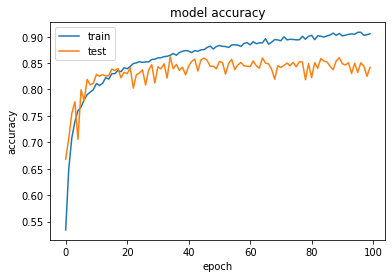

In [ ]:
#plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

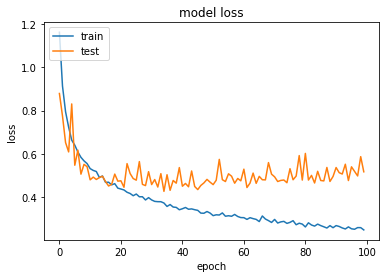

In [ ]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#konversi model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
#simpan model dalam format .tflite
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)